In [1]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Financial_Figures.csv to Cleaned_Financial_Figures.csv


In [2]:
import pandas as pd
df = pd.read_csv("Cleaned_Financial_Figures.csv")
print(df.head())  # Verify the data


                 Company  Fiscal Year  Total Revenue  Net Income  \
0  Microsoft Corporation         2023         211.90       72.30   
1  Microsoft Corporation         2022         198.30       61.30   
2  Microsoft Corporation         2021         168.10       61.20   
3            Tesla  Inc.         2023          96.77       14.99   
4            Tesla  Inc.         2022          81.46       12.56   

   Total Assets  Total Liabilities  Cashflow from Operations  
0        411.00             104.60                     81.00  
1        364.80              97.60                     89.00  
2        333.80              97.00                     76.70  
3        106.62              36.44                     14.72  
4         82.34              33.37                     13.26  


In [4]:
# Sort by Company and Fiscal Year (oldest to newest)
df = df.sort_values(by=["Company", "Fiscal Year"])

# Calculate Year-over-Year Percentage Growth
df["Revenue Growth (%)"] = df.groupby("Company")["Total Revenue"].pct_change() * 100
df["Net Income Growth (%)"] = df.groupby("Company")["Net Income"].pct_change() * 100

# ✅ Display the updated DataFrame properly in Google Colab
from IPython.display import display

# Show the DataFrame with the new columns
print("Updated DataFrame with Growth Calculations:")
display(df)

# ✅ Save the updated DataFrame to a CSV file
df.to_csv("Updated_Financial_Figures.csv", index=False)
print("Updated file saved as 'Updated_Financial_Figures.csv'")


Updated DataFrame with Growth Calculations:


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cashflow from Operations,Revenue Growth (%),Net Income Growth (%)
8,Apple Inc.,2021,365.82,94.68,351.00,287.91,102.06,NaN,NaN
7,Apple Inc.,2022,394.33,99.80,350.08,285.87,104.04,7.793450,5.407689
6,Apple Inc.,2023,383.93,94.68,352.76,283.91,111.44,-2.637385,-5.130261
2,Microsoft Corporation,2021,168.10,61.20,333.80,97.00,76.70,NaN,NaN
1,Microsoft Corporation,2022,198.30,61.30,364.80,97.60,89.00,17.965497,0.163399
0,Microsoft Corporation,2023,211.90,72.30,411.00,104.60,81.00,6.858296,17.944535
5,Tesla Inc.,2021,53.82,5.52,62.13,27.06,11.50,NaN,NaN
4,Tesla Inc.,2022,81.46,12.56,82.34,33.37,13.26,51.356373,127.536232
3,Tesla Inc.,2023,96.77,14.99,106.62,36.44,14.72,18.794500,19.347134


Updated file saved as 'Updated_Financial_Figures.csv'


In [5]:
from google.colab import files
files.download("Updated_Financial_Figures.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Summarize key insights
summary = df.groupby("Company")[["Revenue Growth (%)", "Net Income Growth (%)"]].mean()
print("Average Growth Over the Last 3 Years:")
display(summary)


Average Growth Over the Last 3 Years:


,Revenue Growth (%),Net Income Growth (%)
Company,,
Apple Inc.,2.578033,0.138714
Microsoft Corporation,12.411896,9.053967
Tesla Inc.,35.075437,73.441683


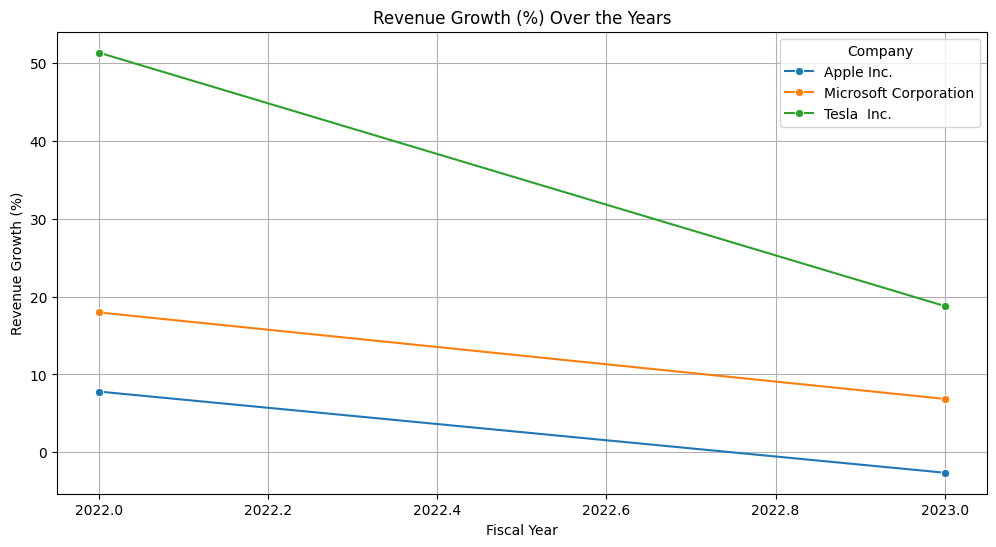

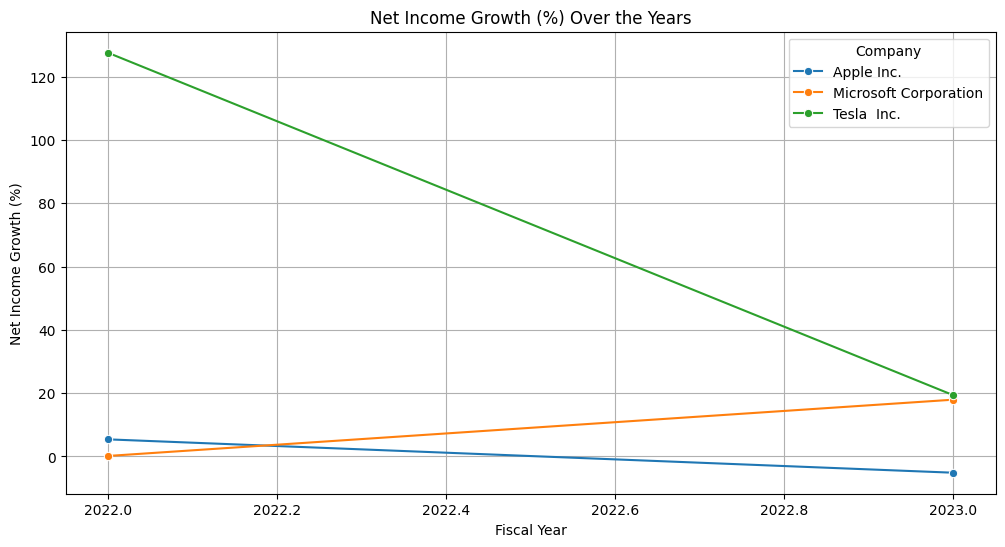

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,6))

# Line plot for Revenue Growth
sns.lineplot(data=df, x="Fiscal Year", y="Revenue Growth (%)", hue="Company", marker="o")
plt.title("Revenue Growth (%) Over the Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Revenue Growth (%)")
plt.legend(title="Company")
plt.grid(True)
plt.show()

# Line plot for Net Income Growth
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Fiscal Year", y="Net Income Growth (%)", hue="Company", marker="o")
plt.title("Net Income Growth (%) Over the Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Net Income Growth (%)")
plt.legend(title="Company")
plt.grid(True)
plt.show()
